# Projeto do curso de Análise Exploratória de Dados

Alunos:     André de Abreu Ferreira e 
            Vinicius Motta dos Santos

Professor:   Allan Suzuki 

Objetivo:

- Analisar uma campanha de crédito realizada por um banco inglês por meio de telemarketing na busca de recomendações para próximas campanhas.
As recomendações podem ser estender a gerência negócio de marketing.

Fonte: https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling 

Os dados estão dispostos no arquivo: `Projectdata_Bank_Personal_Loan_Modelling.csv`

Colunas | Descrição
--------| ----------
Customer ID| ID do cliente.
Age| Idade do cliente em anos completos 
Experience| Anos de experiência profissional.
Income|Renda anual do cliente ($000)*.
ZIPCode|CEP do endereço residencial.
Family| Tamanho da família do cliente
CCAvg| Médias de gastos com cartões de crédito por mês ($ 000)*.
Education|Nível de educação. 1: Estudante universitário; 2: Ensino Superior; 3: Avançado/Profissional.
Mortagage|Valor hipotecário da casa, se houver. (US$ 000)*.
Personal Loan| Este cliente aceitou ou não o empréstimo pessoal oferecido na última campanha?
Securities Account|Conta de Valores Mobiliários - O cliente possui ou não uma conta de valores mobiliários no banco.
CD Account|O cliente possui ou não uma conta de certificado de depósito (CD) no banco.
Online|O cliente utiliza ou não os serviços de internet banking.
CreditCard|Cartão de Crédito - O cliente utiliza ou não cartão de crédito emitido pelo UniversalBank.

*($000) significa que cada unidade representa 1000 USD

Etapas do trabalho:

1   - Carga dos dados do arquivo <br>
1.1 - Verificar a estrutura dos dados<br>
2   - Verificar insconstências<br>
2.1 - Verificação e tratamento de registros duplicados<br>
2.2 - Verificação e tratamento de registros nulos<br>
2.3 - Verificação de registros únicos<br>
2.4 - Verificação e tratamento de registros negativos<br>
2.5 - Verificação de outliers<br>
3 - Análise dos Dados<br>
4 - Conclusão

## 1 - Carga dos dados do arquivo<br>
Carga do arquivo CSV em um DataFrame para início do trabalho.<br>
Neste momento serão importadas as bibliotecas necessárias para as atividades

In [58]:
#instalações
#!python -m pip install phik
#!python -m pip install ydata-profiling

#importar
import pandas as pd
import warnings
import seaborn as sns
import numpy as np
import ydata_profiling
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

# Lendo um arquivo CSV e criando um DataFrame
df_loan = pd.read_csv('./data/Projectdata_Bank_Personal_Loan_Modelling.csv')

# Exir os dados dos arquivos para conferência
df_loan

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6        1.0   
1        2   45          19      34     90089       3    1.5        1.0   
2        3   39          15      11     94720       1    1.0        1.0   
3        4   35           9     100     94112       1    2.7        2.0   
4        5   35           8      45     91330       4    1.0        2.0   
...    ...  ...         ...     ...       ...     ...    ...        ...   
5173  2298   59          35      31     94063       3    0.4        2.0   
5174  1785   54          29     119     91355       3    2.0        1.0   
5175  2010   25           0      99     92735       1    1.9        1.0   
5176  3318   65          41      79     90035       3    2.0        3.0   
5177     1   25           1      49     91107       4    1.6        1.0   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0     0.0   
1            0              0                   1           0     0.0   
2            0              0                   0           0     0.0   
3            0              0                   0           0     0.0   
4            0              0                   0           0     0.0   
...        ...            ...                 ...         ...     ...   
5173         0              0                   0           0     1.0   
5174         0              1                   1           1     0.0   
5175       323              0                   0           0     0.0   
5176         0              0                   0           0     0.0   
5177         0              0                   1           0     0.0   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
5173           1  
5174           0  
5175           0  
5176           0  
5177           0  

[5178 rows x 14 columns]

### 1.1  - Verificar a estrutura dos dados<br>
Exibir todas as possíveis informações basicas do dataset (tamanho, tipos de dados, ...)

In [3]:
# Verificando a matriz do arquivo (linha x coluna)
df_loan.shape

(5178, 14)

Foi verificado que o arquivo contém 5.177 linhas e 14 colunas e 1 linha do header.<br>
Vamos verificar um resumos do aquivo:

In [4]:
#  Detalhando o arquivo
df_loan.info()

# Trazendo informações de quantidade, mínimo, máximo, média, mediana e as porcentagens de 25% a 75% (step de 25%). 
df_loan.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5178 entries, 0 to 5177
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5178 non-null   int64  
 1   Age                 5178 non-null   int64  
 2   Experience          5178 non-null   int64  
 3   Income              5178 non-null   int64  
 4   ZIP Code            5178 non-null   int64  
 5   Family              5178 non-null   int64  
 6   CCAvg               5178 non-null   float64
 7   Education           5138 non-null   float64
 8   Mortgage            5178 non-null   int64  
 9   Personal Loan       5178 non-null   int64  
 10  Securities Account  5178 non-null   int64  
 11  CD Account          5178 non-null   int64  
 12  Online              5129 non-null   float64
 13  CreditCard          5178 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 566.5 KB


count          mean          std     min       25%  \
ID                  5178.0   2501.993820  1444.527705     1.0   1250.25   
Age                 5178.0     45.296253    11.448312    23.0     35.00   
Experience          5178.0     20.062186    11.456867    -3.0     10.00   
Income              5178.0     73.653341    46.011838     8.0     39.00   
ZIP Code            5178.0  93148.713017  2111.707635  9307.0  91910.00   
Family              5178.0      2.394361     1.145804     1.0      1.00   
CCAvg               5178.0      1.932837     1.749178     0.0      0.70   
Education           5138.0      1.881082     0.839499     1.0      1.00   
Mortgage            5178.0     56.741020   101.903500     0.0      0.00   
Personal Loan       5178.0      0.096176     0.294861     0.0      0.00   
Securities Account  5178.0      0.104867     0.306411     0.0      0.00   
CD Account          5178.0      0.059482     0.236548     0.0      0.00   
Online              5129.0      0.594463     0.491044     0.0      0.00   
CreditCard          5178.0      0.294129     0.455694     0.0      0.00   

                        50%       75%      max  
ID                   2506.5   3754.75   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93407.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

## 2   - Verificar insconsistências
Para nos auxiliar nas investigações dos dados, utilizaremos ydata-profiling que gera vários relatórios e poderemos verificar as inconsistências dos dados.  

In [5]:
analyse = ProfileReport(df_loan)
analyse

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Em uma análises dos dados acima, percebemoos que existem iconsistências que precisam ser tratadas, como duplicação de dadoa e valores negativos para experiência.

c:\Users\c085441\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


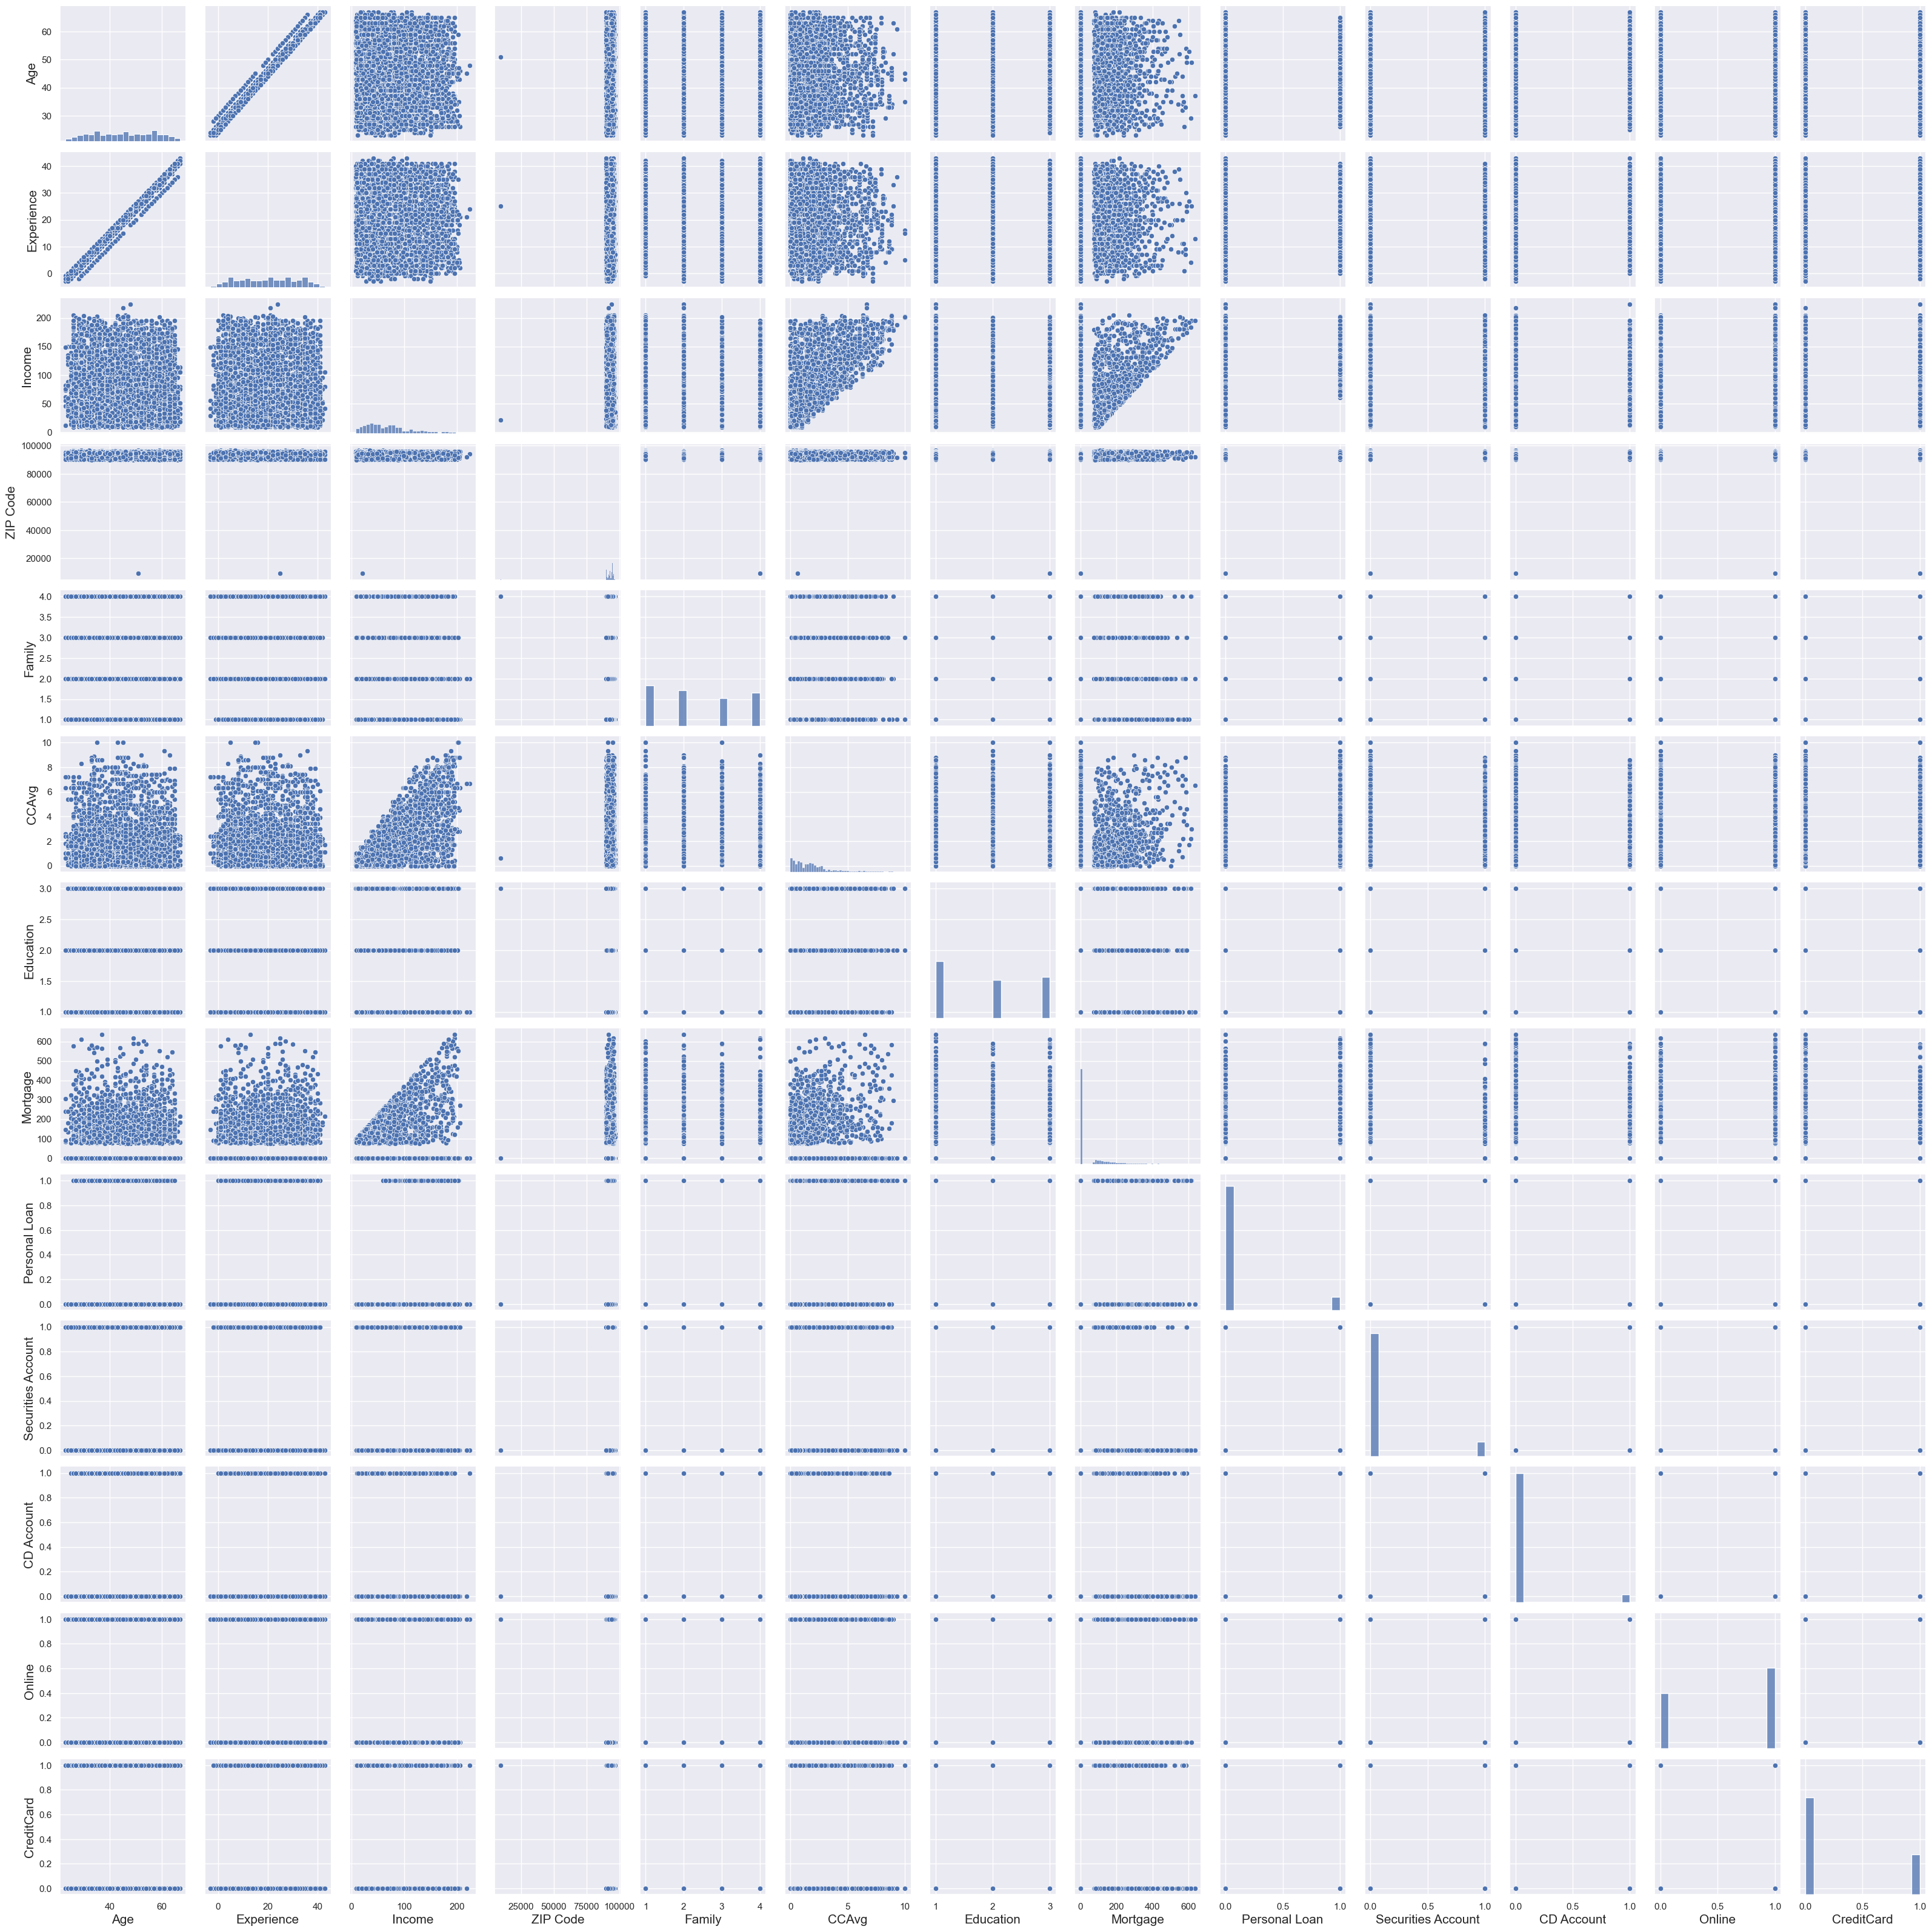

In [60]:
sns.pairplot(df_loan.iloc[:,1:])

Acima, são gerados gráficos de correção de maneira agupada, que podemos auxiliar nas avaliações.

### 2.1 - Verificação e tratamento de registros duplicados
Mapear duplicidades:

In [6]:
# Identificar linhas duplicadas com base em todas as colunas, exceto o ID
Reg_duplicadas = df_loan[df_loan.duplicated()]

# Contar o número total de linhas duplicadas
quant_reg_duplicadas = Reg_duplicadas.shape[0]
print(f"Quantidade de  linhas duplicadas: {quant_reg_duplicadas}\n")
print(Reg_duplicadas)


Quantidade de  linhas duplicadas: 90

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
5042  1946   57          33      30     93106       3    1.5        1.0   
5089  1778   52          27      34     93117       2    0.7        2.0   
5090   315   63          37      45     93437       2    0.7        3.0   
5091  3650   53          29      85     92691       3    1.8        2.0   
5092  1125   38          12      29     94022       4    0.2        1.0   
...    ...  ...         ...     ...       ...     ...    ...        ...   
5173  2298   59          35      31     94063       3    0.4        2.0   
5174  1785   54          29     119     91355       3    2.0        1.0   
5175  2010   25           0      99     92735       1    1.9        1.0   
5176  3318   65          41      79     90035       3    2.0        3.0   
5177     1   25           1      49     91107       4    1.6        1.0   

      Mortgage  Personal Loan  Securities Account  CD Account

Mapear e remover registros duplicados.<br>
Salvar no arquivo com registros saneados.<br>
Realizar verificação se a ação de saneamento de registros duplicados foi bem sucedida.

In [34]:
# Mapear e remover registros duplicados
df_manutencao = df_loan.drop_duplicates(subset=df_loan.columns.difference(['ID']))

# Salvar arquivo novo com dados saneamentos a fim de manter integro o arquivo original
loan_manutencao_arquivo = "./data/Projectdata_Bank_Personal_Loan_Modelling_Atualizado.csv"
df_manutencao.to_csv(loan_manutencao_arquivo, index=False)

# Realizar verificação se o processo de remoção foi bem sucedido 
total_reg = df_manutencao.duplicated(subset=df_manutencao.columns.difference(['ID'])).sum()
print(f"Total de linhas duplicadas após limpeza: {total_reg }")


Total de linhas duplicadas após limpeza: 0


### 2.2 - Verificação e trtamento de registro nulos:

In [37]:
df_manutencao.apply(lambda x : sum(x.isnull()))

ID                     0
Age                    0
Experience             0
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education             40
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                48
CreditCard             0
dtype: int64

Verificamos acima que existem 2 colunas com valores nulos.<br>
Começaremos com o tratamento da coluna Education que apresenta a seguinte proporção:<br>
Valor|Quantidade|%
---|---|---
1.0	|2152|41.6%
3.0	|1541|29.8%
2.0	|1445|27.9%
Nulos|40|0.8%<br>

Optamos pela estratégia de preencher os dados nulos da coluna Education com valor 1, pois é valor de maior incidência para o campo e isso não afetará significativamente a distribuição dos dados, já que em valores absolutos os valores nulos são de apenas 0,8%.

In [38]:
#valores nulos em Education
df_nulos = df_manutencao['Education'].isnull

# Inputar dados nos campos nulos
df_manutencao['Education'].fillna(1.0, inplace=True)


C:\Users\c085441\AppData\Local\Temp\ipykernel_17344\3128094203.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manutencao['Education'].fillna(1.0, inplace=True)


Vamos tratar os valores nulos da coluna Online.<br>
Observamos as seguintes porcentagens:

Valor|Quantidade|%
---|---|---
1.0|3049|58.9%
0.0|2080|40.2%
Nulos|49| 0.9%<br>

Como a incidência de valores nulos correspondem apenas 0,9% do total, optamos por prrencher esses campos nulos com o valor 1.0. Isso nãio trará grandes diferenças nas porcentagens.

In [39]:
#identificar os valores nulos no campos Online
df_nulos = df_manutencao['Online'].isnull

# Inputar dados nos campos nulos
df_manutencao['Online'].fillna(1.0, inplace=True)

C:\Users\c085441\AppData\Local\Temp\ipykernel_17344\3886907501.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manutencao['Online'].fillna(1.0, inplace=True)


Vamos verificar novamente se existem campos nulos.

In [40]:
df_manutencao.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [43]:
df_manutencao['Online'].value_counts()

Online
1.0    3051
0.0    2037
Name: count, dtype: int64

In [44]:
df_manutencao['Education'].value_counts()

Education
1.0    2156
3.0    1514
2.0    1418
Name: count, dtype: int64

Conforme verificação acima, não existem mais campos nulos.

### 2.3 Verificação de registros únicos

Isso permite avaliar se os campos boleanos possuem dados diferentes de 2 (0 ou 1).

In [45]:
df_manutencao.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Os campos Personal Loan, Securities Account, CD Account, Online, CreditCard que são boleanos apresentam apenas  valores únbicos ( 0 e 1). O campo Education apresenta 3 valores únicos (1, 2 e 3), que correspondem ao grau de instrução.

### 2.4 Verificação e tratamento de registros negativos
Verificamos registros negativos nos dados de experiência:

In [49]:
df_manutencao[df_manutencao['Experience']<0]['Experience'].value_counts()

Experience
-1    34
-2    15
-3     4
Name: count, dtype: int64

Avaliamos que foram inseridos valores incorretos e optamos por susbtituí-los por seus valores absolutos:

In [50]:
df_manutencao['Experience'] = df_manutencao['Experience'].apply(abs)

C:\Users\c085441\AppData\Local\Temp\ipykernel_17344\425331609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manutencao['Experience'] = df_manutencao['Experience'].apply(abs)


In [51]:
df_manutencao[df_manutencao['Experience']<0]['Experience'].value_counts()

Series([], Name: count, dtype: int64)

In [52]:
df_manutencao['Experience'].value_counts()

Experience
32    158
20    150
9     150
5     148
25    146
35    145
23    145
28    142
24    140
19    138
3     137
26    137
18    137
16    130
14    129
30    129
27    127
29    126
17    126
34    126
22    126
7     123
15    122
6     121
33    120
13    119
10    119
8     119
37    117
11    116
4     116
36    116
21    115
1     110
31    105
2     104
12    103
38     88
39     85
0      67
40     57
41     43
42      8
43      3
Name: count, dtype: int64

Verificamos assim, que não existem mais valores negativos para experiência.

### 2.5 Verificação de outliers

No relatório mostrado no item 2, as variáveis apresentam um valor Kurtosis, que é um valor de distribuição, que ao apresentar o valor acima de 3, tem forte indicação de ter outilier.<br>
Avaliando todas as avriáveis, verificamos que a coluna Mortage apresenta um valor de 4.6631419.<br>
Abaixo segue o gráfico para melhor representação:

<Axes: xlabel='Mortgage', ylabel='Count'>

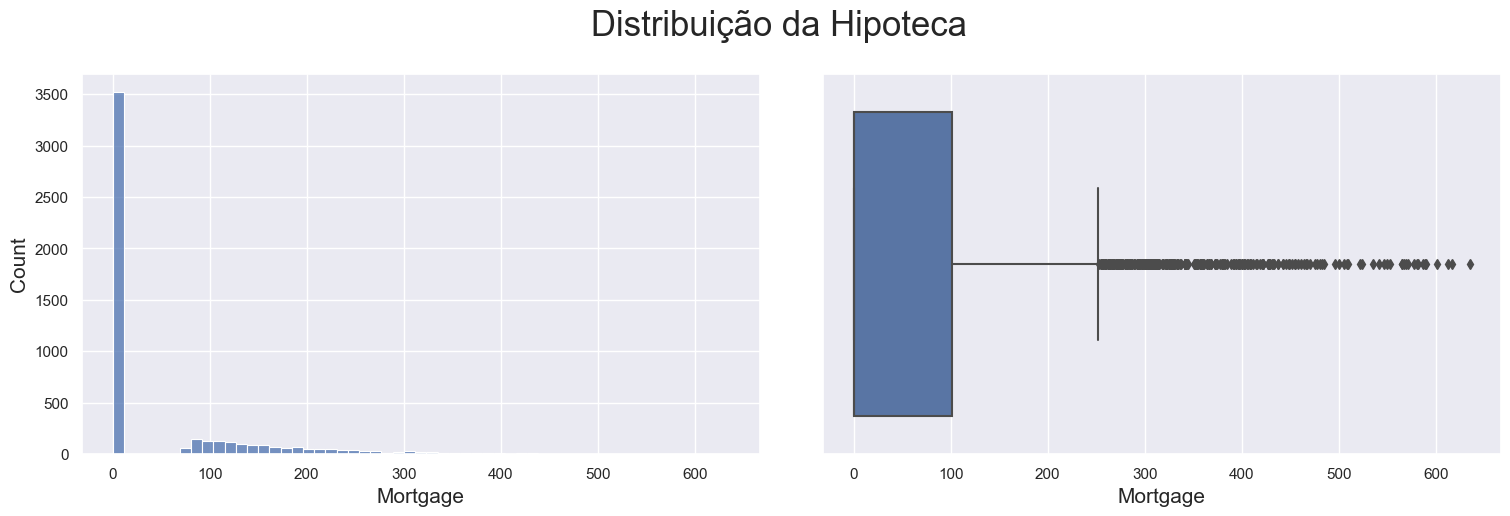

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
plt.suptitle('Distribuição da Hipoteca', fontsize=25)
plt.tight_layout()
sns.boxplot(x='Mortgage', data=df_manutencao, ax=ax[1])
sns.histplot(x='Mortgage', data=df_manutencao, ax=ax[0])

O tratamento desses valores que estão destoantes precisa ser discutido com a áera negocial para elaborar uma estartégia.

## 3. Análises dos dados 

4. Filtre o dataframe entre clientes que possuem e não possuem CDB na column `CD Account` com as categorias `1` e `0`, respectivamente.<br>
Salve os filtros (máscaras booleanas) em variáveis diferentes.

In [ ]:
CDB_0 = df_loan['CD Account'] == 0
CDB_0

0        True
1        True
2        True
3        True
4        True
        ...  
5173     True
5174    False
5175     True
5176     True
5177     True
Name: CD Account, Length: 5178, dtype: bool

In [ ]:
CDB_0 = df_loan['CD Account'] == 1
CDB_0

0       False
1       False
2       False
3       False
4       False
        ...  
5173    False
5174     True
5175    False
5176    False
5177    False
Name: CD Account, Length: 5178, dtype: bool

In [ ]:
df_loan[''].count()

5. Realizamoas agrupamentos a fim de obter relações dos diversos campos. A fim de análise consideramos importantes fazer categorias para nortar os agrupamentos: 
    - Pessoal
    + Idade 
    + Renda 
    + CEP 
    + Família 
    + Educação 

    - Bancários:
    + CCA Média 
    + Valor hipotecário 
    + Empréstimo Pessoal 
    + Conta de Valores Mobiliários 
    + Conta CD 
    + Online 
    + Cartão de Crédito  



Desta forma poderemos trazer visões sobre os aspectos familiar e bancário bem como cruzamentos entre eles.

In [ ]:
#Criando um dataframe identificando os cliente com imprestimos ou não
com_emprestimo = df_loan['CD Account'] == 1
sem_emprestimo = df_loan['CD Account'] == 0
com_emprestimo

print('----')

sem_emprestimo

----


0        True
1        True
2        True
3        True
4        True
        ...  
5173     True
5174    False
5175     True
5176     True
5177     True
Name: CD Account, Length: 5178, dtype: bool

In [ ]:
#Analisando os solteiros.
solteiro = df_loan['Family']==1
mais_membro = df_loan['Family'] > 1

In [ ]:
# mask de pessoas que aceitaram o emprestimo
mask_loan = df_loan['Personal Loan']==1

# mask de pessoas que utilizam o cartao de credito universal bank
mask_card = df_loan['CreditCard']==1

# mask de pessoas que tem hipoteca
mask_mortgage = df_loan['Mortgage']>0

# mask de pessoas que usam servicos online
mask_online = df_loan['Online']==1

df_loan[mask_loan & mask_card].count()

ID                    149
Age                   149
Experience            149
Income                149
ZIP Code              149
Family                149
CCAvg                 149
Education             147
Mortgage              149
Personal Loan         149
Securities Account    149
CD Account            149
Online                148
CreditCard            149
dtype: int64

ID         Age  Experience     Income      ZIP Code  \
count   149.000000  149.000000  149.000000  149.00000    149.000000   
mean   2524.315436   45.369128   20.228188  144.61745  93353.006711   
std    1356.999448   11.557348   11.530290   31.02671   1721.149386   
min      30.000000   26.000000    0.000000   73.00000  90025.000000   
25%    1412.000000   35.000000   10.000000  122.00000  92056.000000   
50%    2401.000000   45.000000   19.000000  142.00000  93955.000000   
75%    3662.000000   55.000000   30.000000  170.00000  94720.000000   
max    4981.000000   65.000000   41.000000  201.00000  96008.000000   

           Family      CCAvg   Education    Mortgage  Personal Loan  \
count  149.000000  149.00000  147.000000  149.000000          149.0   
mean     2.704698    3.97349    2.176871  109.073826            1.0   
std      1.118054    2.03982    0.782520  166.907447            0.0   
min      1.000000    0.10000    1.000000    0.000000            1.0   
25%      2.000000    2.70000    2.000000    0.000000            1.0   
50%      3.000000    3.80000    2.000000    0.000000            1.0   
75%      4.000000    5.40000    3.000000  221.000000            1.0   
max      4.000000   10.00000    3.000000  587.000000            1.0   

       Securities Account  CD Account      Online  CreditCard  
count          149.000000  149.000000  148.000000       149.0  
mean             0.114094    0.630872    0.560811         1.0  
std              0.318998    0.484196    0.497973         0.0  
min              0.000000    0.000000    0.000000         1.0  
25%              0.000000    0.000000    0.000000         1.0  
50%              0.000000    1.000000    1.000000         1.0  
75%              0.000000    1.000000    1.000000         1.0  
max              1.000000    1.000000    1.000000         1.0

In [ ]:
# realizar o describe
df_loan[mask_loan & mask_card].describe(include='all')

ID         Age  Experience     Income      ZIP Code  \
count   149.000000  149.000000  149.000000  149.00000    149.000000   
mean   2524.315436   45.369128   20.228188  144.61745  93353.006711   
std    1356.999448   11.557348   11.530290   31.02671   1721.149386   
min      30.000000   26.000000    0.000000   73.00000  90025.000000   
25%    1412.000000   35.000000   10.000000  122.00000  92056.000000   
50%    2401.000000   45.000000   19.000000  142.00000  93955.000000   
75%    3662.000000   55.000000   30.000000  170.00000  94720.000000   
max    4981.000000   65.000000   41.000000  201.00000  96008.000000   

           Family      CCAvg   Education    Mortgage  Personal Loan  \
count  149.000000  149.00000  147.000000  149.000000          149.0   
mean     2.704698    3.97349    2.176871  109.073826            1.0   
std      1.118054    2.03982    0.782520  166.907447            0.0   
min      1.000000    0.10000    1.000000    0.000000            1.0   
25%      2.000000    2.70000    2.000000    0.000000            1.0   
50%      3.000000    3.80000    2.000000    0.000000            1.0   
75%      4.000000    5.40000    3.000000  221.000000            1.0   
max      4.000000   10.00000    3.000000  587.000000            1.0   

       Securities Account  CD Account      Online  CreditCard  
count          149.000000  149.000000  148.000000       149.0  
mean             0.114094    0.630872    0.560811         1.0  
std              0.318998    0.484196    0.497973         0.0  
min              0.000000    0.000000    0.000000         1.0  
25%              0.000000    0.000000    0.000000         1.0  
50%              0.000000    1.000000    1.000000         1.0  
75%              0.000000    1.000000    1.000000         1.0  
max              1.000000    1.000000    1.000000         1.0

In [ ]:
## Qual é o salário médio por educação pros clientes que aceitaram ou rejeitaram o empréstimo?
df_loan.groupby(['Education', 'Personal Loan'])['Income'].mean()

Education  Personal Loan
1.0        0                 83.054501
           1                136.061856
2.0        0                 52.103175
           1                145.464865
3.0        0                 53.206922
           1                148.094340
Name: Income, dtype: float64

<Axes: >

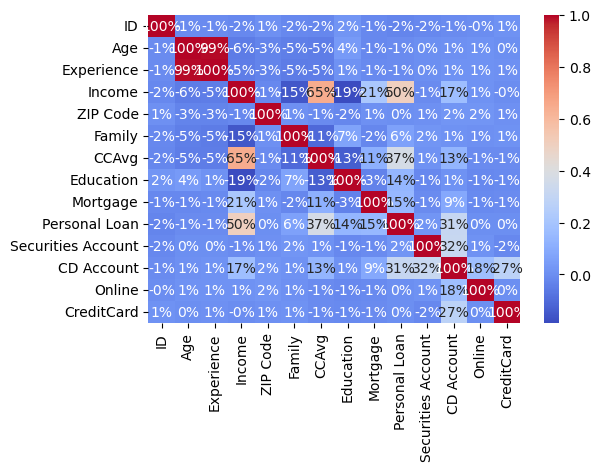

In [ ]:
# Calculando a matriz de correlação
correlacao = df_loan.corr()

# Criando um heatmap


In [ ]:
# Calculando a correlação
df_loan.corr()

ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008563   -0.008188 -0.015458  0.008445   
Age                -0.008563  1.000000    0.994152 -0.055324 -0.030992   
Experience         -0.008188  0.994152    1.000000 -0.046647 -0.030251   
Income             -0.015458 -0.055324   -0.046647  1.000000 -0.014983   
ZIP Code            0.008445 -0.030992   -0.030251 -0.014983  1.000000   
Family             -0.016410 -0.045148   -0.051265 -0.153693  0.008069   
CCAvg              -0.021231 -0.050778   -0.048967  0.645102 -0.005238   
Education           0.018937  0.040332    0.011837 -0.185313 -0.019637   
Mortgage           -0.014871 -0.014686   -0.012461  0.210096  0.008290   
Personal Loan      -0.023398 -0.008213   -0.008232  0.503448  0.000886   
Securities Account -0.016784  0.000668    0.000453 -0.005546  0.005016   
CD Account         -0.008620  0.008756    0.011322  0.169731  0.020209   
Online             -0.002778  0.012625    0.012948  0.012649  0.019319   
CreditCard          0.013089  0.003621    0.005043 -0.000802  0.008159   

                      Family     CCAvg  Education  Mortgage  Personal Loan  \
ID                 -0.016410 -0.021231   0.018937 -0.014871      -0.023398   
Age                -0.045148 -0.050778   0.040332 -0.014686      -0.008213   
Experience         -0.051265 -0.048967   0.011837 -0.012461      -0.008232   
Income             -0.153693  0.645102  -0.185313  0.210096       0.503448   
ZIP Code            0.008069 -0.005238  -0.019637  0.008290       0.000886   
Family              1.000000 -0.106264   0.065454 -0.019581       0.064382   
CCAvg              -0.106264  1.000000  -0.134570  0.114245       0.367575   
Education           0.065454 -0.134570   1.000000 -0.034006       0.136655   
Mortgage           -0.019581  0.114245  -0.034006  1.000000       0.146604   
Personal Loan       0.064382  0.367575   0.136655  0.146604       1.000000   
Securities Account  0.023032  0.010599  -0.014303 -0.007927       0.020901   
CD Account          0.013211  0.132459   0.013117  0.086270       0.313988   
Online              0.007777 -0.008868  -0.014292 -0.009550       0.001540   
CreditCard          0.011242 -0.008799  -0.011802 -0.007927       0.003628   

                    Securities Account  CD Account    Online  CreditCard  
ID                           -0.016784   -0.008620 -0.002778    0.013089  
Age                           0.000668    0.008756  0.012625    0.003621  
Experience                    0.000453    0.011322  0.012948    0.005043  
Income                       -0.005546    0.169731  0.012649   -0.000802  
ZIP Code                      0.005016    0.020209  0.019319    0.008159  
Family                        0.023032    0.013211  0.007777    0.011242  
CCAvg                         0.010599    0.132459 -0.008868   -0.008799  
Education                    -0.014303    0.013117 -0.014292   -0.011802  
Mortgage                     -0.007927    0.086270 -0.009550   -0.007927  
Personal Loan                 0.020901    0.313988  0.001540    0.003628  
Securities Account            1.000000    0.316338  0.012411   -0.017586  
CD Account                    0.316338    1.000000  0.175338    0.274902  
Online                        0.012411    0.175338  1.000000    0.003447  
CreditCard                   -0.017586    0.274902  0.003447    1.000000